# INTRODUCCIÓN

En este proyecto investigaremos si existe una fuerte correlación entre los resultados economicos de un país y la esperanza de vida de sus ciudadanos.

Los objetivos son preparar los datos, a través de un análisis mediante gráficos, e intentar explicar los hallazgos del estudio.

Aquí están unas cuantas cuestiones que en este proyecto intentaremos resolver:

+ ¿Se ha incrementado la esperanza de vida a lo largo del tiempo en las seis naciones?
+ ¿Ha crecido el PIB a lo largo del tiempo en las seis naciones?
+ ¿Existe alguna correlación entre el PIB y la esperanza de vida de un país?
+ ¿Cuál es la esperanza de vida media en estas naciones?
+ ¿Cuál es la distribución de dicha esperanza de vida?

**Fuentes de datos**

- Fuente del PIB: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) datos de cuentas nacionales, y archivos de datos de las cuentas nacionales de la OCDE.

- Fuente de datos sobre la esperanza de vida: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Importar los Módulos de Python

Lo primero es importar los módulos preliminares que usaremos en este proyecto:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Cargar los Datos

Para observar las conexiones entre el PIB y la esperanza de vida, tenemos que cargar los conjuntos de datos en DataFrames para que estos puedan ser visualizados.

Aquí leeremos el archivo **all_data.csv** y lo cargaremos en un Dataframe llamado `df`, seguido de una rápida inspección del Dataframe usando `.head()` para comprobar su contenido.

In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Otra comprobación será ver la forma en la que los datos están almacenados. Parece ser que hay 96 observaciones o filas y 4 columnas.

In [3]:
df.shape

(96, 4)

## Explorar los Datos

Lo primero es saber cuáles son los países que están representados en `df`. Parece ser que son séis países, Chile, China, Alemania, México, los EEUU, y Zimbabue, los representados en los datos. 

In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


El siguiente paso es buscar qué años están representados en los datos, y son del 2000 al 2015.

In [5]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Limpiar los Nombres de las Columnas

Echando un vistazo a los datos, existen varias inconsistencias con los nombres de las columnas. Por ejemplo, los nombres de las dos primeras columnas tienen una sola palabra, mientras que la tercera tiene cinco palabras. El nombre `Life expectancy at birth (years)` es descriptivo, lo cual será bueno para nombrar los ejes, pero un poco difícil para interpretar el código de los gráficos en si. Usaremos la función `rename` para cambiar el nombre de la columna a `EVA`.

In [6]:
df = df.rename({"Life expectancy at birth (years)":"EVA"}, axis = "columns")
df.head()

,Country,Year,EVA,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Gráficos Exploratorios

Explorar los datos a través de gráficos puede ser a veces mucho más efectivo. Abajo mostramos la distribución del `PIB`. La distribución del `PIB` en los datos está muy sesgada a la derecha donde la mayoría de los datos están en el lado izquierdo. Este tipo de distribución suele conocerse como una distribución de ley de potencia, las cuales son lo suficientemente comunes como para tener un nombre propio. Se puede leer mas sobre la ley de potencia [aquí](https://en.wikipedia.org/wiki/Power_law).

<Figure size 800x600 with 0 Axes>

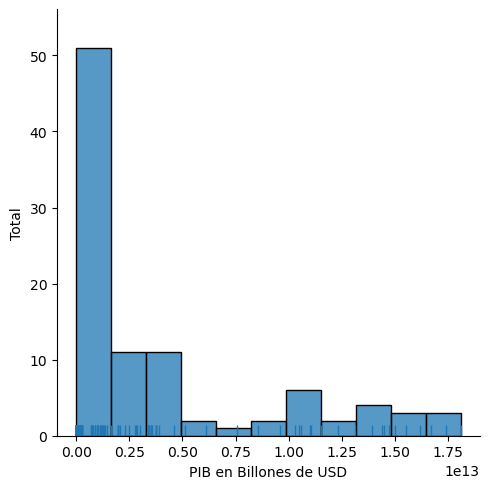

In [7]:
plt.figure(figsize=(8,6))
sns.displot(x='GDP', data=df, rug=True)
plt.xlabel("PIB en Billones de USD")
plt.ylabel("Total");

La siguiente distribución que examinaremos es la distribución de `EVA`. Esta distribución en los datos está muy sesgada a la izquierda donde la mayoría de los valores están en el lado derecho del gráfico. Esto es justamente lo opuesto de lo que observamos en el gráfico anterior. Una mirada más detallada también podría identificar diferentes modos o agrupaciones más pequeñas de distribuciones dentro del rango.

<Figure size 800x600 with 0 Axes>

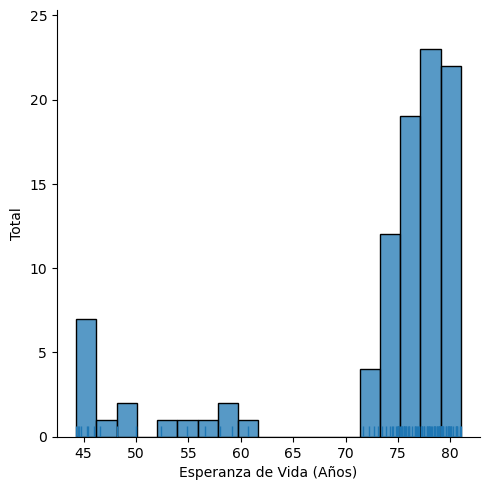

In [8]:
plt.figure(figsize=(8,6))
sns.displot(x='EVA', data=df, rug=True)
plt.xlabel("Esperanza de Vida (Años)")
plt.ylabel("Total");

Los gráficos anteriores no desglosaron los datos por países, por tanto nuestra siguiente tarea será encontrar la media de la `EVA` y el `PIB` por países.

In [9]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [10]:
dfMeans

,Country,EVA,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Ahora que los datos están desglosados por `Country` y las medias para la `EVA` y el `PIB`están calculadas, hemos creado más abajo un gráfico de barras mostrando las medías para cada variable.

El primer gráfico es la Esperanza de Vida y todos los países excepto Zimbabue tienen valores en la mitad alta de los 70. Esto probablemente explique el sesgado en la distribución anterior.

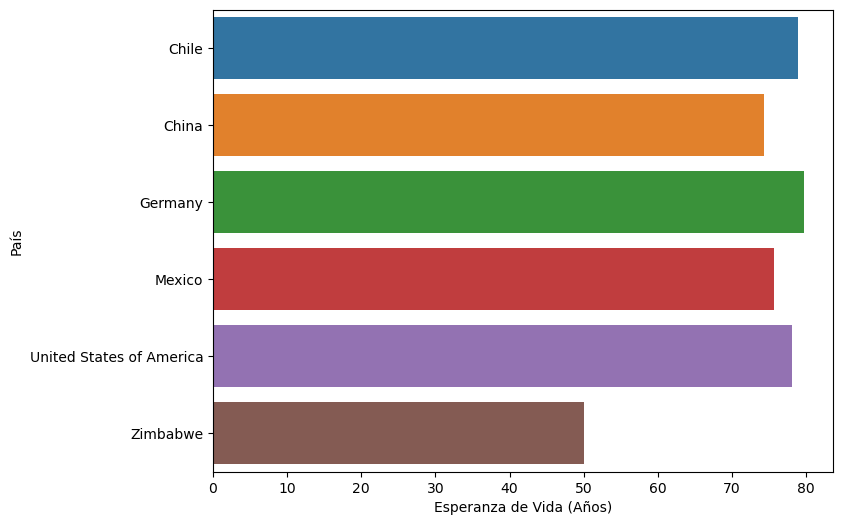

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x="EVA", y="Country", data=dfMeans)
plt.xlabel("Esperanza de Vida (Años)")
plt.ylabel("País");

Para la media del `PIB` por `Country` parece ser que los EEUU tienen un valor mucho más alto comparado con el resto de los países. En este gráfico de barras, Zimbabue no es todavía visible y chile apenas lo es. En comparación los EEUU tienen un enorme PIB comparado con el resto. China, Alemania y México parecen estar relativamente cerca en cifras.

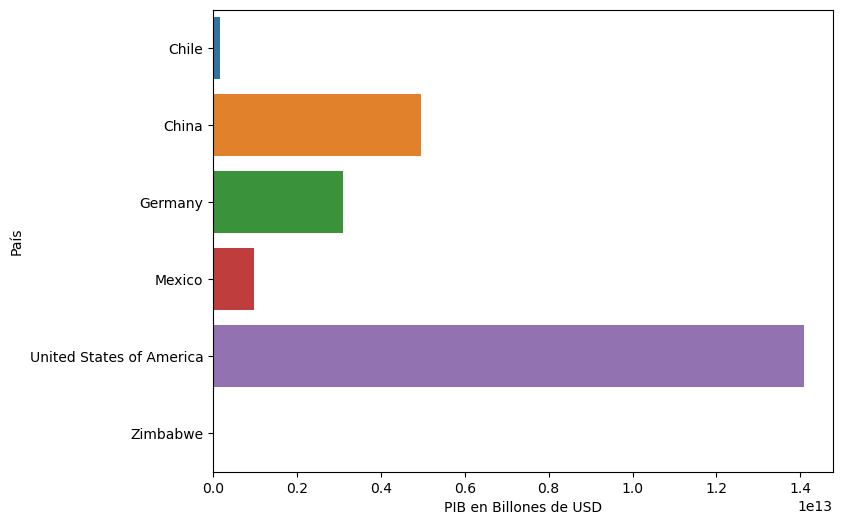

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("PIB en Billones de USD")
plt.ylabel("País");

### Diagramas de Violín

Otra manera de comparar datos es visualizar las distribuciones de cada una y buscar patrones en las formas.

El diagrama de violín es una opción popular ya que puede mostrar la forma de la distribución en comparación con el diagrama de caja. Debajo, los países están en el eje y y la distribución de las columnas numéricas: `PIB` y `EVA` están en el eje x.

En el gráfico del `PIB`en la izquierda, China y los EEUU tienen relativamente el mismo rango de ancho, mientras que Zimbabue, Chile, y México tienen rangos más cortos.

En el gráfico del `EVA`, la mayoría de los países tienen rangos más cortos excepto para Zimbabue que tiene un rango abarcando desde la parte alta de los años 30 a la parte alta de los años 60.

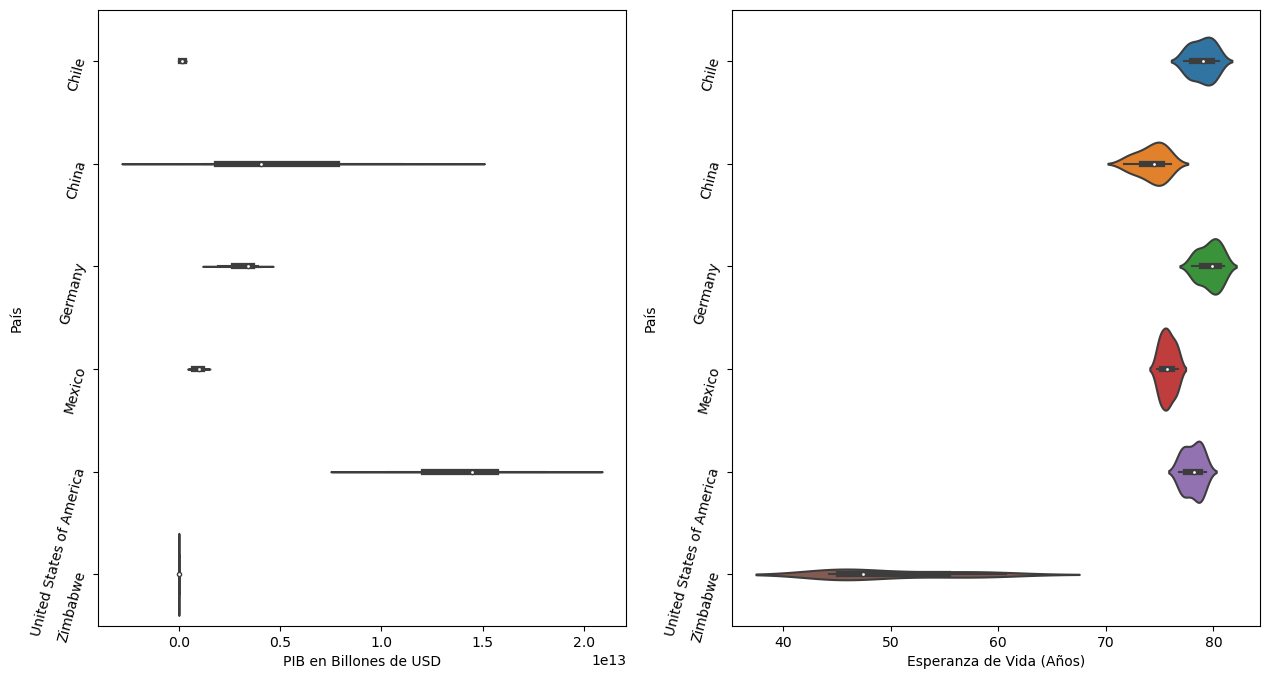

In [13]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
sns.violinplot(x='GDP', y='Country', data=df)
plt.xlabel('PIB en Billones de USD')
plt.ylabel('País')
ax1.set_yticklabels(df.Country.unique(), rotation=75)
ax2 = plt.subplot(1, 2, 2)
sns.violinplot(x='EVA', y='Country', data=df)
plt.xlabel('Esperanza de Vida (Años)')
plt.ylabel('País')
ax2.set_yticklabels(df.Country.unique(), rotation=75);

### Diagramas de Enjambre

Otro método más novedoso para mostrar distribuciones es el diagrama de enjambre, y este puede ser usado para completar los diagramas de cajas y de violín. Primero se muestra el diagrama de enjambre independiente y luego se superpone sobre un diagrama de violín. Los diagramas de enjambre son utiles porque muestran la densidad de puntos alrededor de los valores, así como la distribución por área/forma.

En el caso del gráfico del `PIB` en la izquierda, Chile y Zimbabue tienen una linea vertical de puntos que ilustra el número de puntos de datos que caen alrededor de sus valores. Este detalle podría haberse perdido en el diagrama de cajas, almenos que el lector sea muy experto en visualizaciones de datos.

C:\Users\anton_ax\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\anton_ax\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\anton_ax\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\anton_ax\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


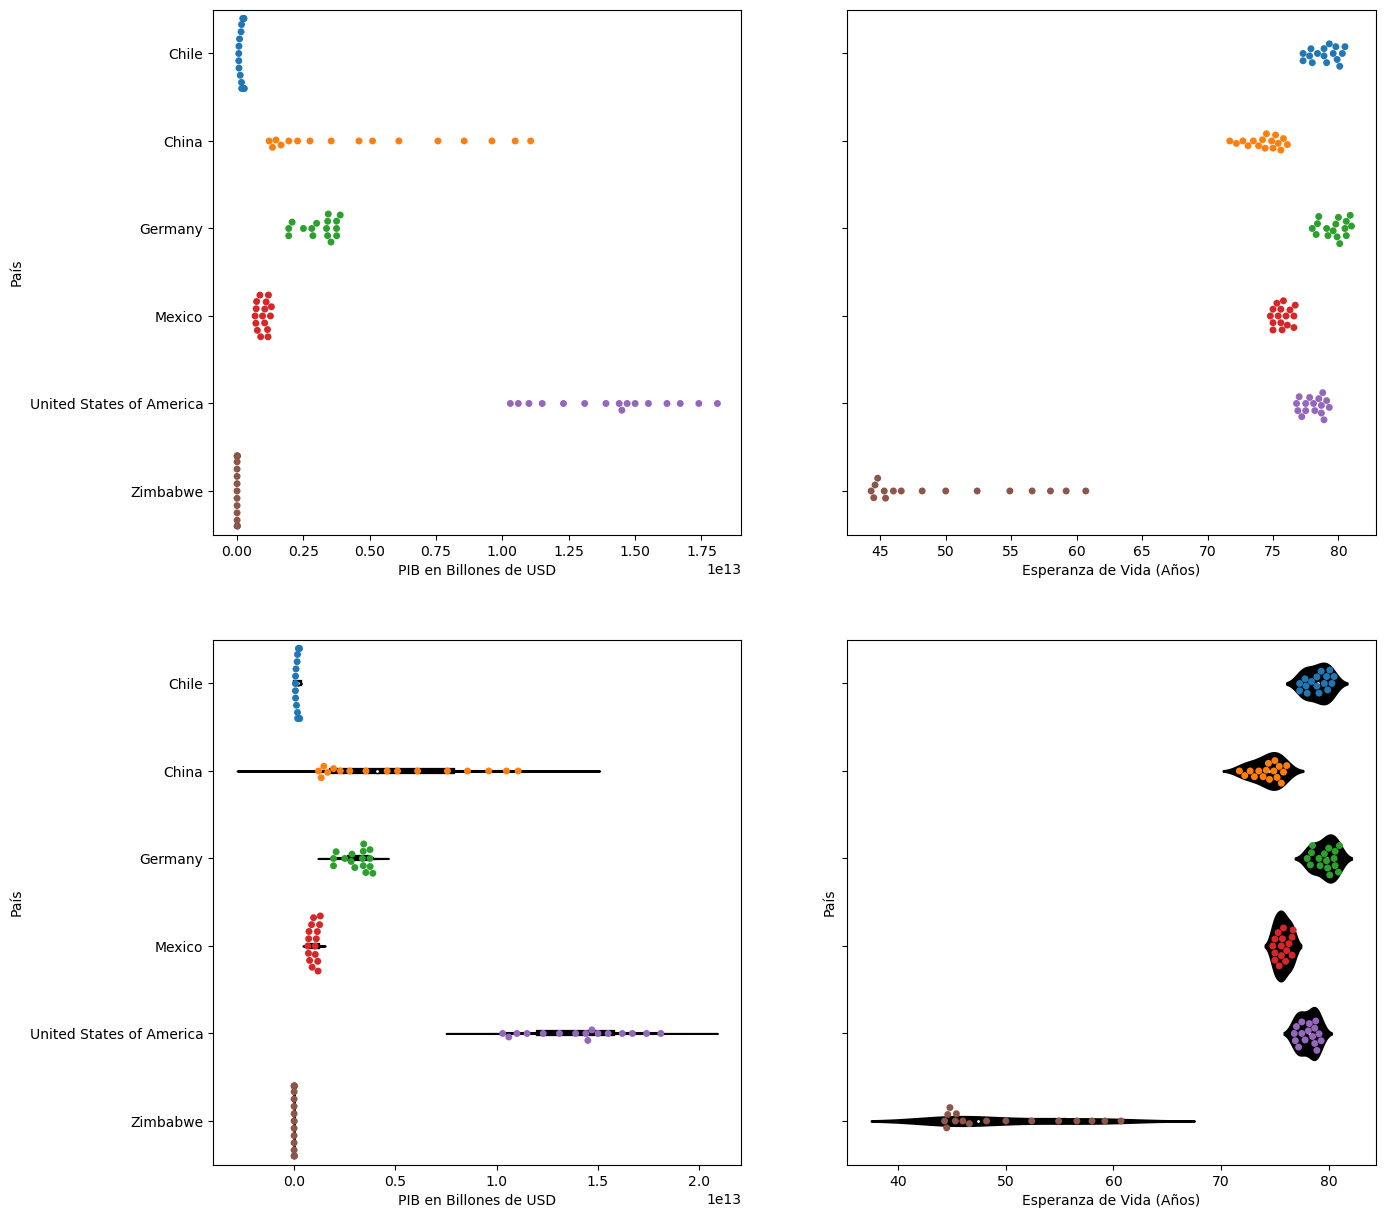

In [14]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 15))
axes[0][0] = sns.swarmplot(ax=axes[0][0], x=df.GDP, y=df.Country, hue=df.Country, legend=False)
axes[0][0].set_xlabel('PIB en Billones de USD')
axes[0][0].set_ylabel('País')
axes[0][1] = sns.swarmplot(ax=axes[0][1], x=df.EVA, y=df.Country, hue=df.Country, legend=False)
axes[0][1].set_xlabel('Esperanza de Vida (Años)')
axes[0][1].set_ylabel('País')
axes[1][0] = sns.violinplot(ax=axes[1][0], x=df.GDP, y=df.Country, color='black')
axes[1][0] = sns.swarmplot(ax=axes[1][0], x=df.GDP, y=df.Country, hue=df.Country, legend=False)
axes[1][0].set_xlabel('PIB en Billones de USD')
axes[1][0].set_ylabel('País')
axes[1][1] = sns.violinplot(ax=axes[1][1], x=df.EVA, y=df.Country, color='black')
axes[1][1] = sns.swarmplot(ax=axes[1][1], x=df.EVA, y=df.Country, hue=df.Country, legend=False)
axes[1][1].set_xlabel('Esperanza de Vida (Años)')
axes[1][1].set_ylabel('País');

### Gráficos de Líneas

Lo siguiente será explorar el `PIB` y la `EVA` a través de los años mediante gráficos de líneas. Abajo los países están separados por colores y se puede ver que los EEUU y China han sido subtancialmente beneficiados entre 2000-2015. China pasó de tener menos de un cuarto de trillón de dólares americanos a un trillón de dólares americanos en este tiempo. El resto de los países no se vieron incrementados en esta magnitud.

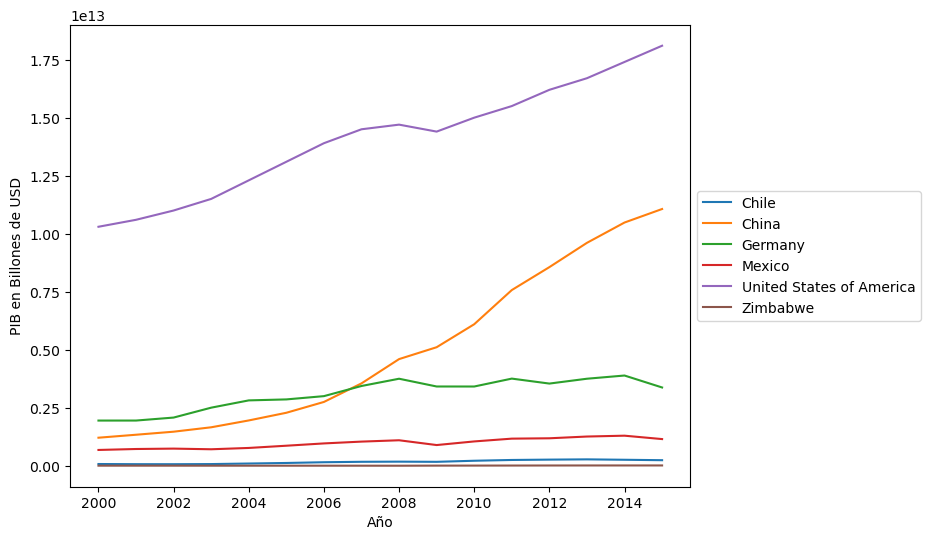

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='GDP', data=df, hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Año')
plt.ylabel('PIB en Billones de USD');

Otro aspecto que se profundizó fueron los gráficos de líneas desglosados por País. En los gráficos individuales, cada país tiene su propio eje y, lo cual hace más fácil el comparar la forma de sus `PIB` a través de los años sin la misma escala. Este método facilita el poder ver qué países han crecido. En el gráfico de abajo, el `PIB` de los otros países crece modestamente comparado a los de China o EEUU, pero todos los países experimentaron un crecimiento desde el año 2000.

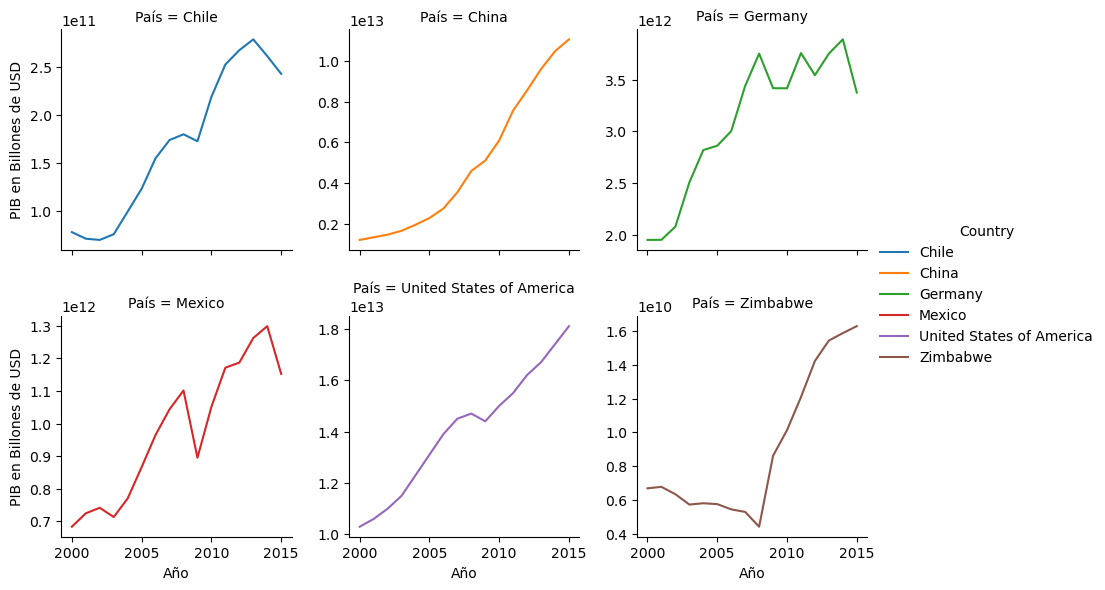

In [16]:
grafPIB = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue="Country", sharey=False)

grafPIB = (grafPIB.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Año","PIB en Billones de USD")
            .set_titles(col_template="País = {col_name}")
            .figure.subplots_adjust(wspace=.25, hspace=.3))

grafPIB;

El gráfico de abajo muestra la esperanza de vida a través de los años. El gráfico muestra que cada país ha estado incrementando su esperanza de vida, pero Zimbabue ha experimentado el mayor aumento después de una pequeña caída alrededor de 2004.

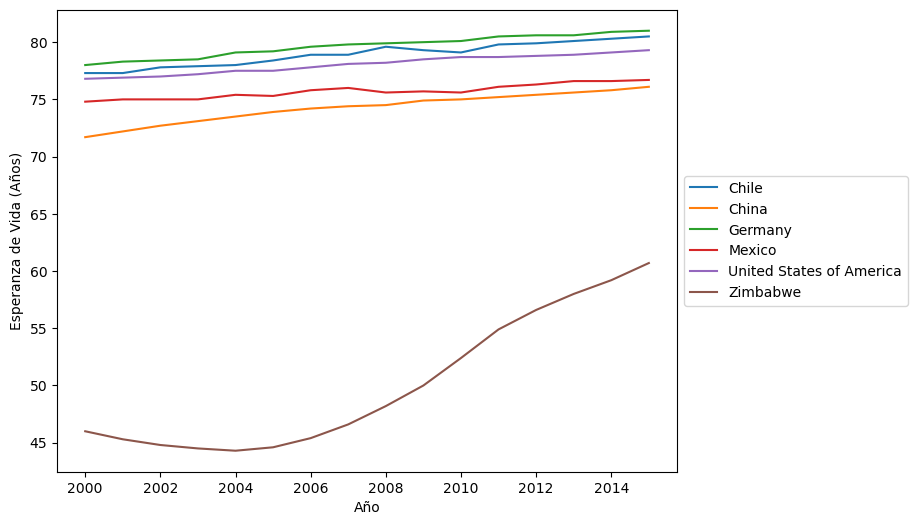

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='EVA', data=df, hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida (Años)');

Al igual que antes se desglosaba el `PIB` por país, el siguiente gráfico desglosa la esperanza de vida por país. Es evidente que Chile y México parecieron experimentar caídas en su esperanza de vida aproximadamente al mismo tiempo, lo que podría analizarse más a fondo. Este tipo de trazado resulta útil ya que muchos de estos matices se perdieron cuando el eje y se compartió entre los países. Además, los cambios aparentemente lineales en realidad no fueron tan fluidos para algunos de los países.

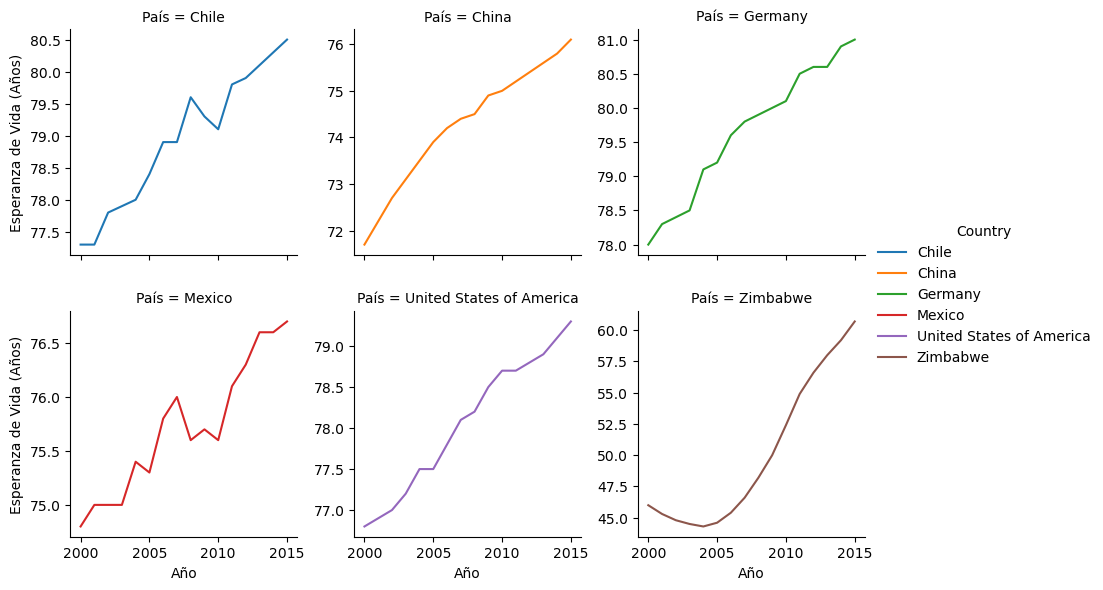

In [18]:
grafEVA = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

grafEVA = (grafEVA.map(sns.lineplot,"Year","EVA")
         .add_legend()
         .set_axis_labels("Año","Esperanza de Vida (Años)")
           .set_titles(col_template="País = {col_name}")
		 .figure.subplots_adjust(wspace=.25, hspace=.25))

grafEVA;

### Diagrama de Dispersión

Los siguientes dos gráficos explorarán la relación entre el `PIB` y la `EVA`. En el gráfico de abajo, muestra al igual que el gráfico anterior donde el `PIB` para Zimbabue se queda plano, mientras que su esperanza de vida está creciendo. Para los otros países parecen exhibir un aumento en la esperanza de vida a medida que aumenta el `PIB`. Los EEUU y China parecen tener curvas muy similares en su relación entre el `PIB` y la esperanza de vida.

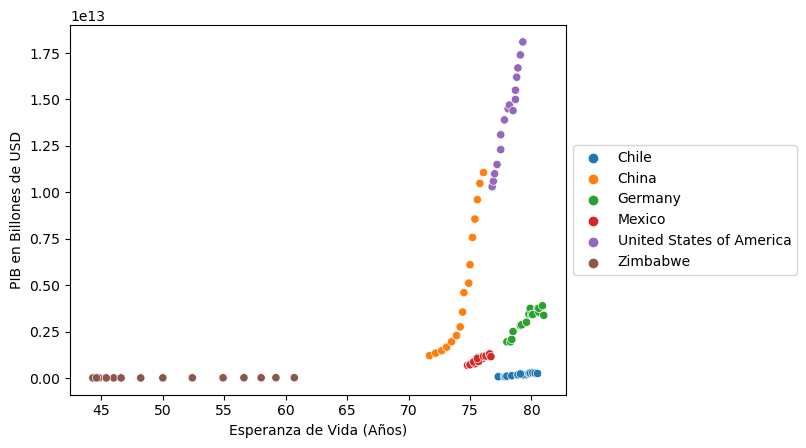

In [19]:
sns.scatterplot(x='EVA', y='GDP', data=df, hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Esperanza de Vida (Años)')
plt.ylabel('PIB en Billones de USD');

Al igual que en los gráficos anteriores, los países se dividen en cada diagrama de dispersión por facetas. Observando cada país de forma individual, más países como los EEUU, México y Zimbabue tienen relaciones lineales entre el `PIB` y la esperanza de vida. China por otro lado, tiene una curva levemente exponencial y la de Chile parece un poco logarítmica. En general al menos uno puede ver un crecimiento en el `PIB` y en la esperanza de vida, exhibiendo una correlación positiva.

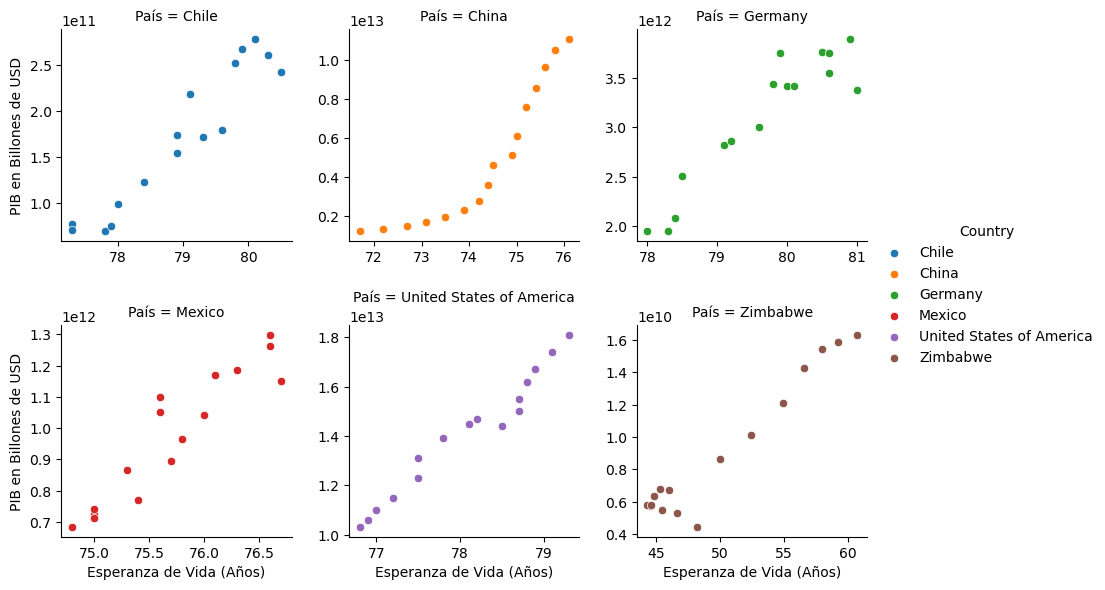

In [20]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"EVA", "GDP")
         .add_legend()
         .set_axis_labels("Esperanza de Vida (Años)", "PIB en Billones de USD")
        .set_titles(col_template="País = {col_name}")
        .figure.subplots_adjust(wspace=.25, hspace=.4));

## Conclusiones

Este proyecto pudo realizar bastantes visualizaciones de datos con los datos a pesar de que solo había 96 filas y 4 columnas.

El proyecto también fue capaz de responder algunas de las cuestiones planteadas al principio:

- ¿Se ha incrementado la esperanza de vida a lo largo del tiempo en las seis naciones?
    - Sí, en especial en Zimbabue teniendo este un gran incremento.
- ¿Ha crecido el PIB a lo largo del tiempo en las seis naciones?
    - El PIB también tiene un crecimiento para todos los países en nuestra lista, especialmente para China.
- ¿Existe alguna correlación entre el PIB y la esperanza de vida de un país?
    - Sí, existe una correlación positiva entre el PIB y la esperanza de vida para todos los países en nuestra lista.
- ¿Cuál es la esperanza de vida media en estas naciones?
    - La esperanza de vida media fue entre la mitad alta de los 70 para todos los países excepto para Zimbabue la cual fue de 50 años.
- ¿Cuál es la distribución de dicha esperanza de vida?
    - La esperanza de vida tenía un sesgo a la izquierda, esto es, la mayoría de las observaciones estaban en el lado derecho.

## Ampliación de la Investigación

El estudio quiso explorar qué ocurrió en China en los últimos 10 años que causó que el `PIB` se incrementara tan drásticamente.
Este [artículo de Forbes](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describe que el increíble crecimiento del `PIB` de China en las últimas décadas fue debido a su gran población, su nuevo capital disponible y su eficiencia de fabricación. El estudio puede determinar que los hallazgos de los datos coinciden con los hallazgos del mundo real sobre el crecimiento del `PIB`en China.